In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
df = pd.read_csv('respostas.csv')
df.tail()

,Carimbo de data/hora,Qual é seu distrito?,1) É gentil,2) É trabalhador,3) Tem uma atitude positiva,4) Ouve atentamente às minhas necessidades e preocupações e interesses,5) É confiável,6) Está bem preparado para ensinar,7) Chega e sai no horário,8) É entusiasmado,...,26) Este/a Instrutor/a me encoraja a falar meu idioma da missão,27) Este/a Instrutor/a fala o idioma da missão o máximo possível,28) Eu me sinto próximo desse Instrutor/a,29) Respeito e admiro esse Instrutor/a,30) Este/a Instrutor/a realmente se preocupa comigo,31) Este/a Instrutor/a me entende,"32) Se não houver uma reposta que descreva seu relacionamento com este(a) instrutor(a), então comente sobre isso aqui:",33) O que você gosta sobre esse instrutor(a)?,34) Quais sugestões você tem para este(a) instrutor(a)?,"35) Comentários e Sugestões. Seu instrutor(a) verá esses comentários depois de sair, mas seu nome NÃO será divulgado."
45,05/02/2021 10:03:07,3A português,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,...,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,Muito bom,Ele ri sempre,Ta perfeito,"Ele é muito inteligente, interativo, preocupad..."
46,05/02/2021 10:04:46,3A-POR,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,...,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,NaN,Tudo dele,Acho que não mudaria nada,"Irmão Vinícius,\nMuito obrigado por tudo. Sou ..."
47,05/02/2021 10:06:30,3 A POR,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,...,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,É boa,O carinho ao explicar o humor a vontade de en...,NaN,NaN
48,05/02/2021 10:15:10,03-A POR,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,...,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,NaN,A alegria e o entusiasmo em ensinar o evangelh...,NaN,"Obrigado por sorrir sempre, e por transmitir e..."
49,05/02/2021 10:20:00,3A português,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,...,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,"Sou inteiramente grata pelas risadas, pela con...","TUDO, mas principalmente, dos testemunhos que ...","Continue sendo sorridente, diligente, atencios...","Obrigada. Ah é, não pode esquecer que A ORAÇÃO..."


In [4]:
def clean_district(distrito):
    if "37" in distrito:
        return "37-A POR"
    elif "16" in distrito:
        return "16-A ESP"
    elif "26" in distrito:
        return "26-A ING"
    elif "32" in distrito:
        return "32-B ING"
    elif "40" in distrito:
        return "40-B POR"
    elif "45" in distrito:
        return "45-B POR"
    else:
        return "03-A POR"

In [5]:
df['Qual é seu distrito?'] = df['Qual é seu distrito?'].apply(clean_district)
df.tail()

,Carimbo de data/hora,Qual é seu distrito?,1) É gentil,2) É trabalhador,3) Tem uma atitude positiva,4) Ouve atentamente às minhas necessidades e preocupações e interesses,5) É confiável,6) Está bem preparado para ensinar,7) Chega e sai no horário,8) É entusiasmado,...,26) Este/a Instrutor/a me encoraja a falar meu idioma da missão,27) Este/a Instrutor/a fala o idioma da missão o máximo possível,28) Eu me sinto próximo desse Instrutor/a,29) Respeito e admiro esse Instrutor/a,30) Este/a Instrutor/a realmente se preocupa comigo,31) Este/a Instrutor/a me entende,"32) Se não houver uma reposta que descreva seu relacionamento com este(a) instrutor(a), então comente sobre isso aqui:",33) O que você gosta sobre esse instrutor(a)?,34) Quais sugestões você tem para este(a) instrutor(a)?,"35) Comentários e Sugestões. Seu instrutor(a) verá esses comentários depois de sair, mas seu nome NÃO será divulgado."
45,05/02/2021 10:03:07,03-A POR,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,...,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,Muito bom,Ele ri sempre,Ta perfeito,"Ele é muito inteligente, interativo, preocupad..."
46,05/02/2021 10:04:46,03-A POR,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,...,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,NaN,Tudo dele,Acho que não mudaria nada,"Irmão Vinícius,\nMuito obrigado por tudo. Sou ..."
47,05/02/2021 10:06:30,03-A POR,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,...,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,É boa,O carinho ao explicar o humor a vontade de en...,NaN,NaN
48,05/02/2021 10:15:10,03-A POR,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,...,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,NaN,A alegria e o entusiasmo em ensinar o evangelh...,NaN,"Obrigado por sorrir sempre, e por transmitir e..."
49,05/02/2021 10:20:00,03-A POR,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,...,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,A - Concordo Totalmente,"Sou inteiramente grata pelas risadas, pela con...","TUDO, mas principalmente, dos testemunhos que ...","Continue sendo sorridente, diligente, atencios...","Obrigada. Ah é, não pode esquecer que A ORAÇÃO..."


In [6]:
# 32) Se não houver uma reposta que descreva seu relacionamento com este(a) instrutor(a), então comente sobre isso aqui:
p32 = " ".join(df.iloc[:, 33].dropna())
p32 = p32.replace('!', '').replace('.', '').replace(',', '').lower()
p32

'son muy geniales :3 melhor amigo muita bem eu amo todos as instutoros porque eles sao muita bem e simpatica tudo bem he is great and fun bom relecionamento com vini foi muito incrível ele realmente consegue transmitir sua alegria para nós  muito bom boa boa espetacular super top  muito bom  é boa sou inteiramente grata pelas risadas pela confiança e pela amizade '

In [7]:
# 33) O que você gosta sobre esse instrutor(a)?
p33 = " ".join(df.iloc[:, 34].dropna())
p33 = p33.replace('!', '').replace('.', '').replace(',', '').replace('/', ' ').lower()
p33

'ele é muito gentil e me ajudou bastante para me tornar uma missia melhor o doce espirito que ele tras para nós todas as aulas admiro seu entusiasmo e sua alegria ao ensinar é um excelente professor sus buenas actitudes engraçado e espiritual seu testemunho alegria bondade  ele pode entender ensinar  y fazer sentir o espiritu de uma maneira muito especial e simple always fun to be around and makes the learning fun very funny and entertaining makes every class very fun and i love learning portuguese with him he truly believes in me as a missionary he is fun and i enjoy his class greatly engraçado ele e muita animada todos as dias todos as tempo eu nao entendi mas verdade he is very fun and integrates lots of fun into the lessons he also will take take times to connect to the spirit and focus on the doctrines and principles along with key things in our teachers i love that vinicius is so kind hearted that he showed up everyday of class with a huge smile on his face and he was always read

In [8]:
# 34) Quais sugestões você tem para este(a) instrutor(a)?
p34 = " ".join(df.iloc[:, 35].dropna())
p34 = p34.replace('!', '').replace('.', '').replace(',', '').replace('/', ' ').replace('\n', '').lower()
p34

"nunca deixar de ser o instrutor que ele é que sigan así y nunca cambién <3 none he does a great job no suggestions no sei eu nao sei? sometimes he can back down on the jokes a little also there were a few times he just repeated what he said slower to explain something he said in portuguese but there still was confusion so it could have been reworded to be explained but usually he was very fun and a very good teacher who was thoughtful in his lessons and such none at the beginning i thought i was kinda overwhelmed cause you would speak a lot of portuguese but now i'm glad you did because i feel like i can speak better because of it  misturar as coisas na classe um pouco mais um pouco mais quebra kkkkkk mais jogos de linguagem when we dont know a word in portuguese instead of just acting out what it is act it out and then say it in english so we can hear it too certifique-se de que o distrito compreende o que deve fazer antes de ir para break-out rooms nunca nenhum alge tempo ele fala r

In [9]:
# 35) Comentários e Sugestões. Seu instrutor(a) verá esses comentários depois de sair, mas seu nome NÃO será divulgado.
p35 = " ".join(df.iloc[:, 36].dropna())
p35 = p35.replace('!', '').replace('.', '').replace(',', '').replace('/', ' ').replace('\n', '').lower()
p35

"sempre faça praticas usando os missionarios fiquei sensivel ao ispirito graças a essas praticas ;) seu entusiasmo e seu modo de ensinar son geniales jeje 3 eu amo irmao continue fazendo o que você faz é muito espiritual e engraçado um ótimo instrutor sing to us more i loved how many games we played to learn- you truly gave me a great time in the ctm maybe a suggestion: double check with someone what we are supposed to do before a break out room so we all know what we are doing but otherwise- awesome class bom trabalho irmao vinicius i learned so much from you over these six weeks and had fun doing it continue to teach the way you do because you helped me do something really hard in learning a language and made it fun thank you so much obrigado  voce sao muita legal obrigado por muito bem ensinamentos keep up the good work remember sometimes joking when people are confused can make it harder and sometimes we need a bit more - rephrasing or more context - to fully understand what is bei

In [10]:
stopwords = set(STOPWORDS)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [11]:
stopwords.update(['de', 'da', 'do', 'dos', 'das', 'e', 'ou', 'que', 'muita', 'muito', 'muitas', 'muitos', 'em', 'o', 'a',
                 'é', 'pelo', 'pela', 'pelos', 'pelas', 'por', 'para', 'todo', 'toda', 'todos', 'todas', 'você', 'sim', 'não',
                 'ele', 'nós', 'nos', 'se', 'bem', 'bom', 'boa', 'muy', 'tudo', 'porque', 'eu', 'sua', 'seu', 'suas', 'seus',
                 'sempre', 'faz', 'um', 'uma', 'os', 'as', 'always', 'never', 'sempre', 'nunca', 'nao', 'mais', 'sei', 'pouco',
                 'sendo', 'assim', 'said', 'voce', 'son', 'sou', 'sao', 'eles', 'realmente', 'consegue', 'instutoros', 'fazer',
                 'missionários', 'sometimes', 'something', 'still', 'suggestions', 'little', 'times', 'irmão', 'irmao',
                  'vinicius'])

# Se não houver uma reposta que descreva seu relacionamento com este(a) instrutor(a), então comente sobre isso aqui

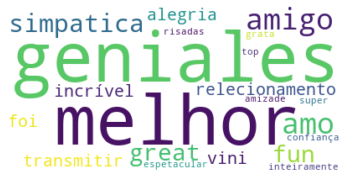

In [12]:
wc32 = WordCloud(stopwords=stopwords, background_color='white').generate(p32)
plt.figure()
plt.imshow(wc32, interpolation='bilinear')
plt.axis("off")
plt.show()

# O que você gosta sobre esse instrutor(a)?

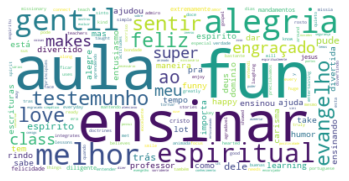

In [13]:
wc33 = WordCloud(stopwords=stopwords, background_color='white').generate(p33)
plt.figure()
plt.imshow(wc33, interpolation='bilinear')
plt.axis("off")
plt.show()

# Quais sugestões você tem para este(a) instrutor(a)?

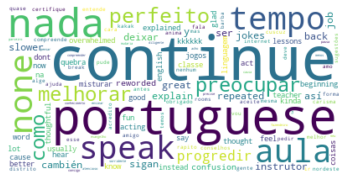

In [14]:
wc34 = WordCloud(stopwords=stopwords, background_color='white').generate(p34)
plt.figure()
plt.imshow(wc34, interpolation='bilinear')
plt.axis("off")
plt.show()

## Tentando entender um pouco melhor as sugestões dos falantes de inglês

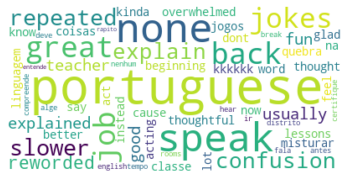

In [15]:
ing = " ".join(df.loc[df['Qual é seu distrito?'].isin(['26-A ING', '32-B ING']), :].iloc[:, 35].dropna())
ing = ing.lower().replace('?', '').replace('\n', '').replace('.', '').replace(',', '')
wcing = WordCloud(stopwords=stopwords, background_color = 'white').generate(ing)
plt.figure()
plt.imshow(wcing, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
ing

"none he does a great job no suggestions no sei eu nao sei sometimes he can back down on the jokes a little also there were a few times he just repeated what he said slower to explain something he said in portuguese but there still was confusion so it could have been reworded to be explained but usually he was very fun and a very good teacher who was thoughtful in his lessons and such none at the beginning i thought i was kinda overwhelmed cause you would speak a lot of portuguese but now i'm glad you did because i feel like i can speak better because of it  misturar as coisas na classe um pouco mais um pouco mais quebra kkkkkk mais jogos de linguagem when we dont know a word in portuguese instead of just acting out what it is act it out and then say it in english so we can hear it too certifique-se de que o distrito compreende o que deve fazer antes de ir para break-out rooms nunca nenhum alge tempo ele fala rapito e eu  nao entende "

In [17]:
# Armazenando as sugestões dos falantes de ingLês
suggestions_ing = ['less jokes', 'rewording', 'more breaks', 'more games', 'say in english after you acted out',
                   'make sure they understand before sending them to breakout rooms', 'speak slower']

## Agora tentando entender um pouco melhor as sugestões dos falantes de português ou espanhol

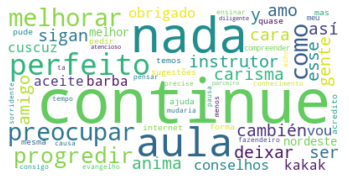

In [18]:
poresp = " ".join(df.loc[~ df['Qual é seu distrito?'].isin(['26-A ING', '32-B ING']), :].iloc[:, 35].dropna())
poresp = poresp.lower().replace(',', '').replace('.', '').replace('!', '')
wcporesp = WordCloud(stopwords=stopwords, background_color = 'white').generate(poresp)
plt.figure()
plt.imshow(wcporesp, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
poresp

"nunca deixar de ser o instrutor que ele é que sigan así y nunca cambién <3 continue assim carisma anima muito a aula continue assim 😊 continue sendo sempre esse cara gente boa e amigo amo você e obrigado por seus conselhos e sempre vou fazer a barba kakak  aceite que o cuscuz do nordeste é melhor 0 sugestões quase perfeito :')  não se preocupar com a internet e não se preocupar em pedir ajuda para os missionários sei que sempre temos o que melhorar e como progredir mas acredito que da mesma forma que pude compreender e progredir no meu conhecimento do evangelho e em como ensinar por causa de suas aulas não consigo pensar em nada no que precise melhorar mais  tempo de pausa   e menos fazendeiro  continue sempre assim  nada ta perfeito acho que não mudaria nada continue sendo sorridente diligente atencioso parceiro dos missionários "

# Comentários e Sugestões. Seu instrutor(a) verá esses comentários depois de sair, mas seu nome NÃO será divulgado.

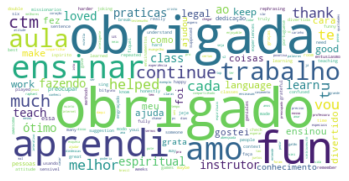

In [20]:
wc35 = WordCloud(stopwords=stopwords, background_color='white').generate(p35)
plt.figure()
plt.imshow(wc35, interpolation='bilinear')
plt.axis("off")
plt.show()